In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings
warnings.filterwarnings("ignore")


## Read the dataset

In [4]:
import pandas as pd

df = pd.read_csv('D:\major project\food delivey estimation\food delivey estimation\dataset\train.csv')


OSError: [Errno 22] Invalid argument: 'D:\\major project\x0cood delivey estimation\x0cood delivey estimation\\dataset\train.csv'

In [3]:
df

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,(min) 21
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,(min) 30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45588,0x7c09,JAPRES04DEL01,30,4.8,26.902328,75.794257,26.912328,75.804257,24-03-2022,11:35:00,11:45:00,conditions Windy,High,1,Meal,motorcycle,0,No,Metropolitian,(min) 32
45589,0xd641,AGRRES16DEL01,21,4.6,0.000000,0.000000,0.070000,0.070000,16-02-2022,19:55:00,20:10:00,conditions Windy,Jam,0,Buffet,motorcycle,1,No,Metropolitian,(min) 36
45590,0x4f8d,CHENRES08DEL03,30,4.9,13.022394,80.242439,13.052394,80.272439,11-03-2022,23:50:00,00:05:00,conditions Cloudy,Low,1,Drinks,scooter,0,No,Metropolitian,(min) 16
45591,0x5eee,COIMBRES11DEL01,20,4.7,11.001753,76.986241,11.041753,77.026241,07-03-2022,13:35:00,13:40:00,conditions Cloudy,High,0,Snack,motorcycle,1,No,Metropolitian,(min) 26


In [4]:
df.City.unique()

array(['Urban ', 'Metropolitian ', 'Semi-Urban ', 'NaN '], dtype=object)

## Data Cleaning

######  * Clean target and feature variables from unnecesarry information
######  * Handle NaN values

In [5]:
'''
Remove "min" string from target variable and get numerical target
'''
df["Time_taken(min)"] = df["Time_taken(min)"].apply(lambda x: x[len("(min) "):]).astype(int)
df.rename(columns={"Time_taken(min)" : "Time_taken"},inplace=True)

In [6]:
df["Weatherconditions"].unique()


array(['conditions Sunny', 'conditions Stormy', 'conditions Sandstorms',
       'conditions Cloudy', 'conditions Fog', 'conditions Windy',
       'conditions NaN'], dtype=object)

In [7]:
'''
Remove "conditions" string from weather conditions feature and convert string "NaN" values to np.nan
'''

df["Weatherconditions"] = df["Weatherconditions"].apply(lambda x: x[len("conditions "):])
df["Weatherconditions"].replace("NaN", np.nan, inplace=True)

In [8]:
print(df["Road_traffic_density"].unique())

['High ' 'Jam ' 'Low ' 'Medium ' 'NaN ']


In [9]:
'''
It seems "NaN" strings have a space after them, convert both "NaN " and "NaN" to object Null values
'''

df.replace("NaN ", np.nan, inplace=True)
df.replace("NaN", np.nan, inplace=True)

df.isna().sum()

ID                                0
Delivery_person_ID                0
Delivery_person_Age            1854
Delivery_person_Ratings        1908
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Order_Date                        0
Time_Orderd                    1731
Time_Order_picked                 0
Weatherconditions               616
Road_traffic_density            601
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
multiple_deliveries             993
Festival                        228
City                           1200
Time_taken                        0
dtype: int64

In [10]:
for i in df.columns:
    if df[i].isna().sum()>0:
        print(f"{i} :",df[i].isna().sum()/len(df[i])*100)

Delivery_person_Age : 4.066413703858048
Delivery_person_Ratings : 4.184852937951001
Time_Orderd : 3.7966354484241003
Weatherconditions : 1.3510845963196105
Road_traffic_density : 1.318184809071568
multiple_deliveries : 2.177965915820411
Festival : 0.5000767661702454
City : 2.631982979843397


In [11]:
m1=df['multiple_deliveries'].mode()[0]
df['multiple_deliveries'].fillna(m1,inplace=True)
m2=df['Vehicle_condition'].mode()[0]
df['Vehicle_condition'].fillna(m2,inplace=True)

In [12]:
md1=df['Delivery_person_Age'].median()
df['Delivery_person_Age'].fillna(md1,inplace=True)
md2=df['Delivery_person_Ratings'].median()
df['Delivery_person_Ratings'].fillna(md2,inplace=True)
md3=df['Type_of_order'].mode()[0]
df['Type_of_order'].fillna(md3,inplace=True)
md4=df['Weatherconditions'].mode()[0]
df['Weatherconditions'].fillna(md4,inplace=True)
md5=df['Road_traffic_density'].mode()[0]
df['Road_traffic_density'].fillna(md5,inplace=True)
md7=df['Festival'].mode()[0]
df['Festival'].fillna(md7,inplace=True)
md8=df['City'].mode()[0]
df['City'].fillna(md8,inplace=True)

TypeError: Cannot convert ['37' '34' '23' ... '30' '20' '23'] to numeric

In [13]:
df["Time_Orderd"] = df["Time_Orderd"].fillna(df["Time_Order_picked"])

In [14]:
df.isna().sum()

ID                                0
Delivery_person_ID                0
Delivery_person_Age            1854
Delivery_person_Ratings        1908
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Order_Date                        0
Time_Orderd                       0
Time_Order_picked                 0
Weatherconditions               616
Road_traffic_density            601
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
multiple_deliveries               0
Festival                        228
City                           1200
Time_taken                        0
dtype: int64

### Handling Outliers

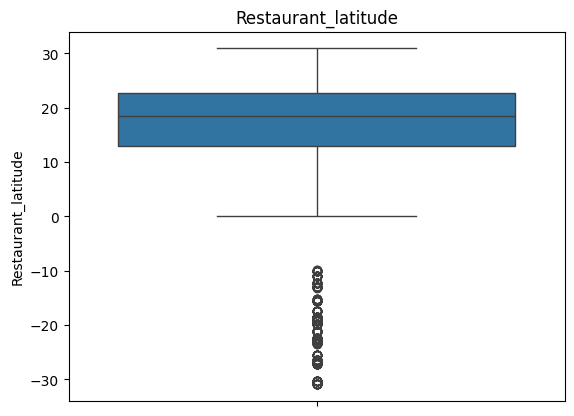

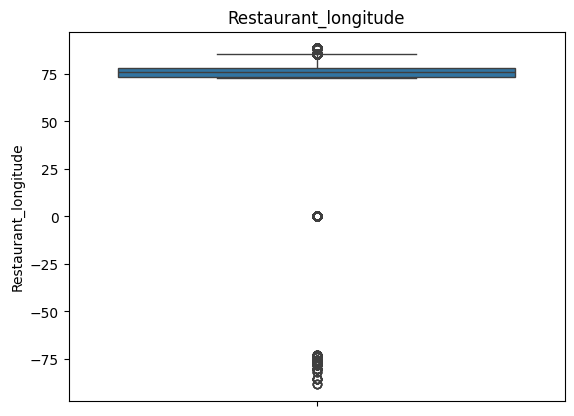

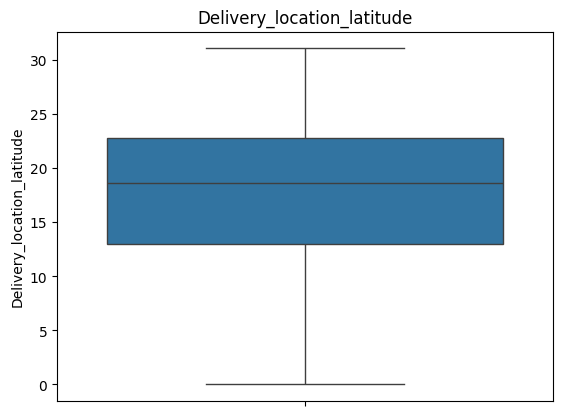

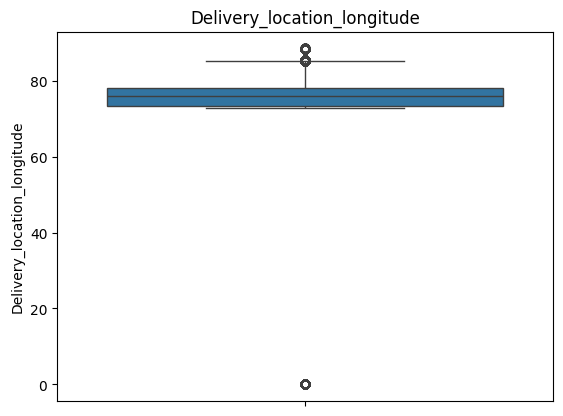

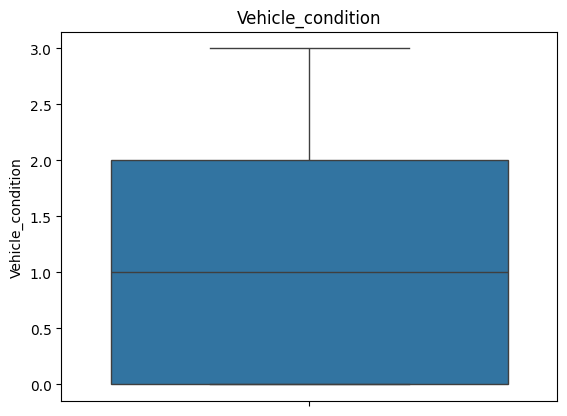

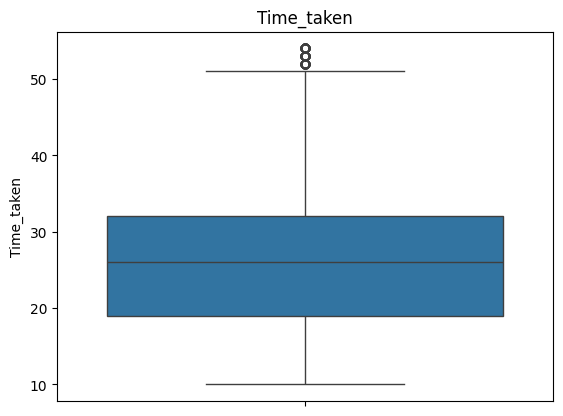

In [15]:
for i in df.columns:
    if type(df[i][0])!=str:
        sns.boxplot(df[i])
        plt.title(i)
        plt.show()

In [16]:
df['Delivery_person_Age']=df.Delivery_person_Age.astype(float)

In [17]:
IQR=df['Delivery_person_Age'].quantile(0.75)-df['Delivery_person_Age'].quantile(0.25)
upper=df['Delivery_person_Age'].quantile(0.75)+1.5*(IQR)
lower=df['Delivery_person_Age'].quantile(0.25)-1.5*(IQR)
df['Delivery_person_Age']=np.where(df['Delivery_person_Age']>upper,upper,np.where(df['Delivery_person_Age']<lower,lower,df['Delivery_person_Age']))

### Dropping Unwanted Columns

In [18]:
df.drop(['ID'],axis=1,inplace=True)
df.drop(['Delivery_person_ID'],axis=1,inplace=True)
df.drop(['Order_Date'],axis=1,inplace=True)

In [19]:
df.shape

(45593, 17)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Delivery_person_Age          43739 non-null  float64
 1   Delivery_person_Ratings      43685 non-null  object 
 2   Restaurant_latitude          45593 non-null  float64
 3   Restaurant_longitude         45593 non-null  float64
 4   Delivery_location_latitude   45593 non-null  float64
 5   Delivery_location_longitude  45593 non-null  float64
 6   Time_Orderd                  45593 non-null  object 
 7   Time_Order_picked            45593 non-null  object 
 8   Weatherconditions            44977 non-null  object 
 9   Road_traffic_density         44992 non-null  object 
 10  Vehicle_condition            45593 non-null  int64  
 11  Type_of_order                45593 non-null  object 
 12  Type_of_vehicle              45593 non-null  object 
 13  multiple_deliver

In [21]:
df.describe()

,Delivery_person_Age,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Vehicle_condition,Time_taken
count,43739.000000,45593.000000,45593.000000,45593.000000,45593.000000,45593.000000,45593.000000
mean,29.567137,17.017729,70.231332,17.465186,70.845702,1.023359,26.294607
std,5.815155,8.185109,22.883647,7.335122,21.118812,0.839065,9.383806
min,15.000000,-30.905562,-88.366217,0.010000,0.010000,0.000000,10.000000
25%,25.000000,12.933284,73.170000,12.988453,73.280000,0.000000,19.000000
50%,30.000000,18.546947,75.898497,18.633934,76.002574,1.000000,26.000000
75%,35.000000,22.728163,78.044095,22.785049,78.107044,2.000000,32.000000
max,50.000000,30.914057,88.433452,31.054057,88.563452,3.000000,54.000000


### Univariate Analysis

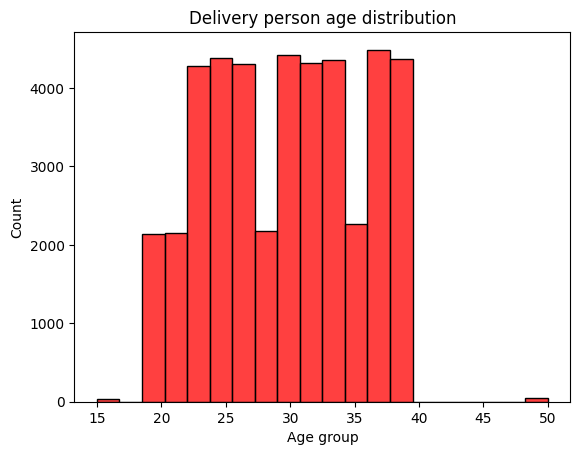

In [22]:
sns.histplot(df.Delivery_person_Age,bins=20,kde=False,color='Red')
plt.title("Delivery person age distribution")
plt.xlabel("Age group")
plt.show()

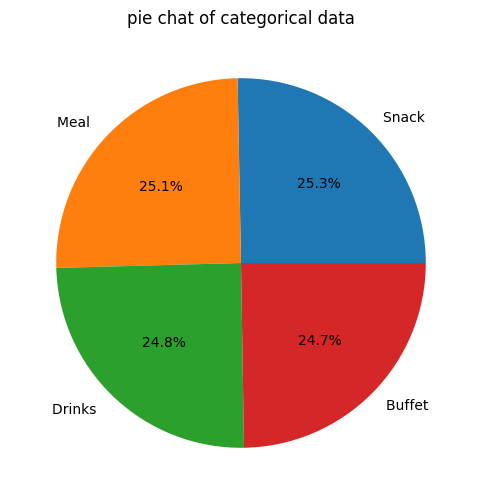

In [23]:
frequency=df['Type_of_order'].value_counts()
plt.figure(figsize=(10,6))
plt.pie(frequency,labels=frequency.index,autopct='%1.1f%%')
plt.title('pie chat of categorical data')
plt.show()

### Bivariate Analysis

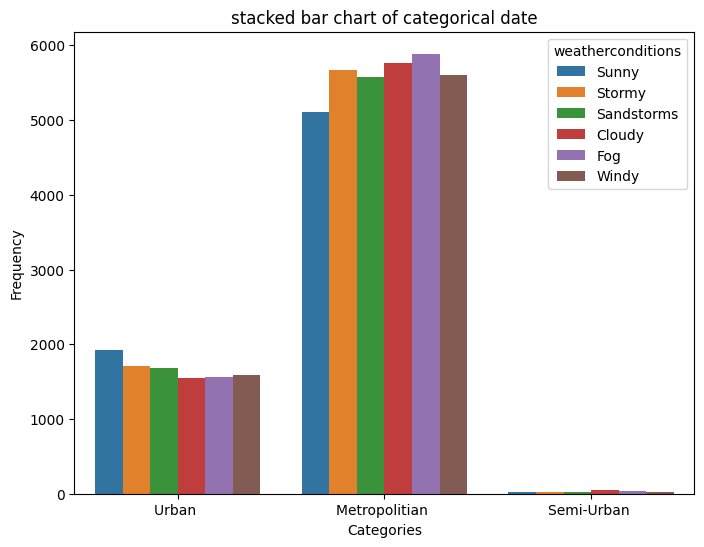

In [24]:
frequency=df['City'].value_counts()
plt.figure(figsize=(8,6))
sns.countplot(data=df,x='City',hue='Weatherconditions')
plt.xlabel('Categories')
plt.ylabel('Frequency')
plt.title('stacked bar chart of categorical date')
plt.legend(title='weatherconditions')
plt.show()

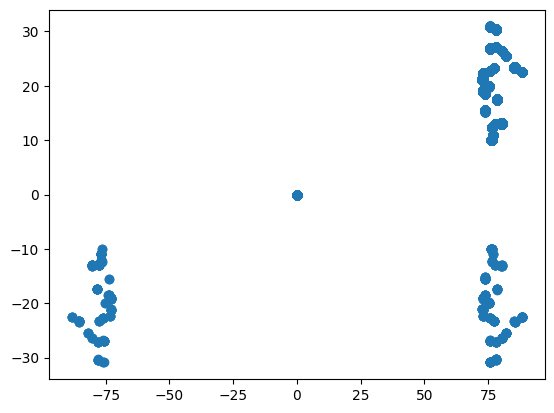

In [25]:
plt.scatter(x=df['Restaurant_longitude'],y=df['Restaurant_latitude'])
plt.show()

## feature engineering

### Column Transformation

In [27]:
import math
def haversine(lat1,lon1,lat2,lon2):
    lat1=math.radians(lat1)
    lon1=math.radians(lon1)
    lat2=math.radians(lat2)
    lon2=math.radians(lon2)
    radius=6371.0
    dlon=lon2-lon1
    dlat=lat2-lat1
    a=math.sin(dlat/2)**2+math.cos(lat1)*math.cos(lat2)*math.sin(dlon/2)**2
    c=2*math.atan2(math.sqrt(a),math.sqrt(1-a))
    distance=radius*c
    return distance

In [28]:
df['distance_km']=df.apply(lambda row: haversine(row['Restaurant_latitude'],row['Restaurant_longitude'],row['Delivery_location_latitude'],row['Delivery_location_longitude']),axis=1)

In [29]:
df.drop(['Restaurant_latitude'],axis=1,inplace=True)
df.drop(['Restaurant_longitude'],axis=1,inplace=True)
df.drop(['Delivery_location_latitude'],axis=1,inplace=True)
df.drop(['Delivery_location_longitude'],axis=1,inplace=True)

### Data Transformation

In [30]:
df['Delivery_person_Ratings']=df.Delivery_person_Ratings.astype(float)

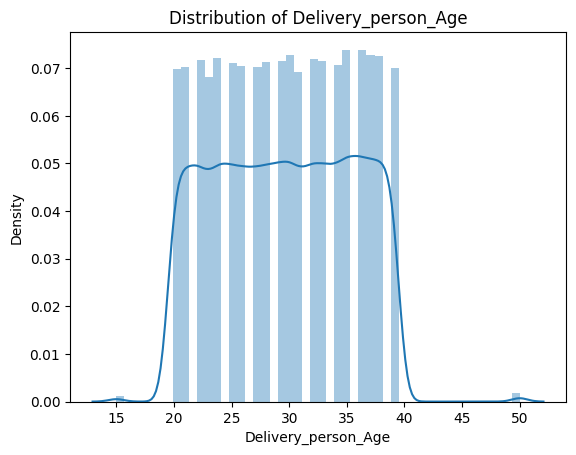

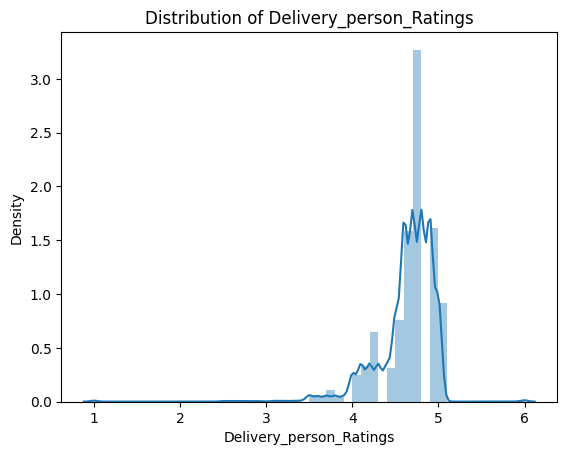

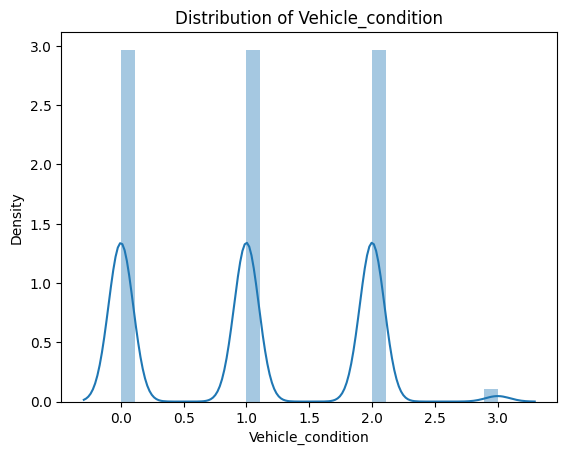

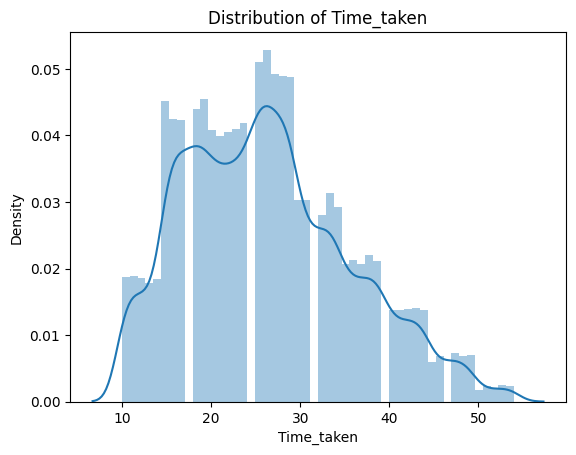

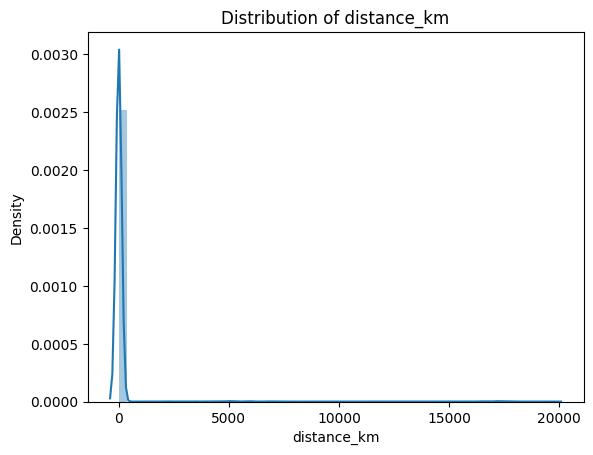

In [31]:
for column in df.columns:
    if df[column].dtype!='O':
        sns.distplot(df[column])
        plt.title(f'Distribution of {column}')
        plt.show()

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Delivery_person_Age      43739 non-null  float64
 1   Delivery_person_Ratings  43685 non-null  float64
 2   Time_Orderd              45593 non-null  object 
 3   Time_Order_picked        45593 non-null  object 
 4   Weatherconditions        44977 non-null  object 
 5   Road_traffic_density     44992 non-null  object 
 6   Vehicle_condition        45593 non-null  int64  
 7   Type_of_order            45593 non-null  object 
 8   Type_of_vehicle          45593 non-null  object 
 9   multiple_deliveries      45593 non-null  object 
 10  Festival                 45365 non-null  object 
 11  City                     44393 non-null  object 
 12  Time_taken               45593 non-null  int32  
 13  distance_km              45593 non-null  float64
dtypes: float64(3), int32(1

In [33]:
import pickle
from sklearn.preprocessing import LabelEncoder
label_encoders={}
for col in df.columns:
    if df[col].dtype=='O':
        label_encoders[col]=LabelEncoder()
label_encoders

{'Time_Orderd': LabelEncoder(),
 'Time_Order_picked': LabelEncoder(),
 'Weatherconditions': LabelEncoder(),
 'Road_traffic_density': LabelEncoder(),
 'Type_of_order': LabelEncoder(),
 'Type_of_vehicle': LabelEncoder(),
 'multiple_deliveries': LabelEncoder(),
 'Festival': LabelEncoder(),
 'City': LabelEncoder()}

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Delivery_person_Age      43739 non-null  float64
 1   Delivery_person_Ratings  43685 non-null  float64
 2   Time_Orderd              45593 non-null  object 
 3   Time_Order_picked        45593 non-null  object 
 4   Weatherconditions        44977 non-null  object 
 5   Road_traffic_density     44992 non-null  object 
 6   Vehicle_condition        45593 non-null  int64  
 7   Type_of_order            45593 non-null  object 
 8   Type_of_vehicle          45593 non-null  object 
 9   multiple_deliveries      45593 non-null  object 
 10  Festival                 45365 non-null  object 
 11  City                     44393 non-null  object 
 12  Time_taken               45593 non-null  int32  
 13  distance_km              45593 non-null  float64
dtypes: float64(3), int32(1

In [35]:
for col in df.columns:
    if df[col].dtype=='O':
        df[col]=label_encoders[col].fit_transform(df[col])
        filename=f"{col}.pkl"
        pickle.dump(label_encoders[col],open(filename,"wb"))
        

## Splitting Data Into Train And Test


In [36]:
x=df.drop(['Time_taken'],axis=1)
y=df['Time_taken']
y

0        24
1        33
2        26
3        21
4        30
         ..
45588    32
45589    36
45590    16
45591    26
45592    36
Name: Time_taken, Length: 45593, dtype: int32

## Scaling


In [37]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x=ss.fit_transform(x)


In [38]:
filename="ss.pkl"
pickle.dump(ss,open(filename,"wb"))

## Performing Train Test Split:


In [39]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

# Model Building
## Training The Model In Multiple Algorithms:


In [40]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [41]:
def predictions(model):
    models=model.fit(X_train,y_train)
    y_pred_test=models.predict(X_test)
    y_pred_train=models.predict(X_train)
    print("R2Score for  Traning",r2_score(y_pred_train,y_train))
    print("\n")
    print("MSE for Training:",mean_squared_error(y_pred_train,y_train))
    print("\n")
    print("MAE for Training:",mean_squared_error(y_pred_train,y_train))
    print("\n")
    print("R2Score for  Testing",r2_score(y_pred_test,y_test))
    print("\n")
    print("MSE for Testing:",mean_squared_error(y_pred_test,y_test))
    print("\n")
    print("MAE for Testing:",mean_absolute_error(y_pred_test,y_test))
    print("\n")

## Decision Tree Model


In [42]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()

In [43]:
predictions(dt)

R2Score for  Traning 0.5962168904819017


MSE for Training: 25.354985027838758


MAE for Training: 25.354985027838758


R2Score for  Testing 0.5784267165668113


MSE for Testing: 26.552542085674407


MAE for Testing: 4.048785135336906




In [44]:
from sklearn.ensemble import RandomForestRegressor
rd=RandomForestRegressor()

In [45]:
predictions(rd)

R2Score for  Traning 0.551624592657148


MSE for Training: 24.700867127183553


MAE for Training: 24.700867127183553


R2Score for  Testing 0.5366544861423284


MSE for Testing: 25.666259605545218


MAE for Testing: 4.003251681143311




In [46]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor()

In [ ]:
predictions(knn)

In [49]:
from xgboost import XGBRegressor
xg=XGBRegressor()
predictions(xg)

R2Score for  Traning 0.8401849569991099


MSE for Training: 11.740184600792155


MAE for Training: 11.740184600792155


R2Score for  Testing 0.7792499220752817


MSE for Testing: 16.052545221184765


MAE for Testing: 3.182578477567716




## Implementing RandomSearchCV For XGBoost:


In [50]:
from sklearn.model_selection import RandomizedSearchCV
param_grid={
    'n_estimators':[100,200,300,400],
    'max_depth':[3,4,5,6,7],
    'learning_rate':[0.01,0.1,0.2,0.3],
    'subsample':[0.7,0.8,0.9,1.0],
    'colsample_bytree':[0.7,0.8,0.9,1.0],
    'gamma':[0,0.1,0.2,0.3],
}
scoring='neg_mean_squared_error'
random_search=RandomizedSearchCV(xg,param_distributions=param_grid,n_iter=25,scoring=scoring,cv=5,verbose=2,n_jobs=-1,random_state=42)
random_search


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          n_estimators=None, n_jobs=None,
                                          num_parallel_tree=None,
                                          random_state=None, ...),
                   n_iter=25, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.7, 0.8, 0.9,
                                                             1.0],
                                        'gamma': [0, 0.1, 0.2, 0.3],
                                        'learning_rate': [0.01, 0.1, 0.2, 0.3],
                                        'max_depth': [3, 4, 5, 6, 7],
                                        'n_estimators': [100, 200, 300, 400],
                                        'subsample': [0.7, 0.8, 0.9, 1.0]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [51]:
predictions(random_search)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
R2Score for  Traning 0.8214425993024947


MSE for Training: 12.784205791068807


MAE for Training: 12.784205791068807


R2Score for  Testing 0.7816404369065921


MSE for Testing: 15.482719686695582


MAE for Testing: 3.140156119365757




In [53]:
param_dist={
    'criterion':['mse','friedman_mse','mae','poisson'],
    'splitter':['best','random'],
    'max_depth':[None]+list(np.arange(1,20)),
    'min_samples_split':list(np.arange(2,21)),
    'min_samples_leaf':list(np.arange(1,21)),
}
random_search=RandomizedSearchCV(dt,param_distributions=param_dist,n_iter=100,n_jobs=-1,cv=5,verbose=2,random_state=42)
random_search

RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['mse', 'friedman_mse',
                                                      'mae', 'poisson'],
                                        'max_depth': [None, 1, 2, 3, 4, 5, 6, 7,
                                                      8, 9, 10, 11, 12, 13, 14,
                                                      15, 16, 17, 18, 19],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9, 10, 11,
                                                             12, 13, 14, 15, 16,
                                                             17, 18, 19, 20],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7,
                                                              8, 9, 10, 11, 12,
                                                              13, 14, 15, 16,
                                                              17, 18, 19, 20],
                                        'splitter': ['best', 'random']},
                   random_state=42, verbose=2)

In [54]:
predictions(random_search)
best_params=random_search.best_params_
best_model=random_search.best_estimator_

print("Best Hyperparameters:",best_params)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
R2Score for  Traning 0.5841002920428484


MSE for Training: 25.892055829615252


MAE for Training: 25.892055829615252


R2Score for  Testing 0.5807906707895183


MSE for Testing: 26.384892292254996


MAE for Testing: 4.044694560606422


Best Hyperparameters: {'splitter': 'best', 'min_samples_split': 20, 'min_samples_leaf': 18, 'max_depth': 8, 'criterion': 'friedman_mse'}


In [55]:
param_dist={
    'criterion':['mse','friedman_mse','mae','poisson'],
    'max_depth':[None]+list(np.arange(1,20)),
    'min_samples_split':list(np.arange(2,21)),
    'min_samples_leaf':list(np.arange(1,21)),
}



In [56]:
random_search=RandomizedSearchCV(rd,param_distributions=param_dist,n_iter=10,n_jobs=-1,verbose=1,random_state=42)
random_search.fit(x,y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'criterion': ['mse', 'friedman_mse',
                                                      'mae', 'poisson'],
                                        'max_depth': [None, 1, 2, 3, 4, 5, 6, 7,
                                                      8, 9, 10, 11, 12, 13, 14,
                                                      15, 16, 17, 18, 19],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9, 10, 11,
                                                             12, 13, 14, 15, 16,
                                                             17, 18, 19, 20],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7,
                                                              8, 9, 10, 11, 12,
                                                              13, 14, 15, 16,
                                                              17, 18, 19, 20]},
                   random_state=42, verbose=1)

In [57]:
best_model=random_search.best_estimator_

In [58]:
predictions(best_model)

R2Score for  Traning 0.6116657265801331


MSE for Training: 23.51195606109113


MAE for Training: 23.51195606109113


R2Score for  Testing 0.5980635454244978


MSE for Testing: 24.496429491895213


MAE for Testing: 3.91582260516478




In [59]:
import pickle
filename="rf.pkl"
pickle.dump(random_search,open(filename,"wb"))

In [60]:
df

,Delivery_person_Age,Delivery_person_Ratings,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken,distance_km
0,37.0,4.9,44,46,4,0,2,3,2,0,0,2,24,3.025149
1,34.0,4.5,142,143,3,1,2,3,3,1,0,0,33,20.183530
2,23.0,4.4,8,10,2,2,0,1,2,1,0,2,26,1.552758
3,38.0,4.7,121,123,4,3,0,0,2,1,0,0,21,7.790401
4,32.0,4.6,68,70,0,0,1,3,3,1,0,0,30,6.210138
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45588,30.0,4.8,45,46,5,0,1,2,2,0,0,0,32,1.489846
45589,21.0,4.6,144,147,5,1,0,0,2,1,0,0,36,11.007735
45590,30.0,4.9,191,1,0,2,1,1,3,0,0,0,16,4.657195
45591,20.0,4.7,69,69,0,0,0,3,2,1,0,0,26,6.232393


In [61]:
df.Road_traffic_density.unique()

array([0, 1, 2, 3, 4])

In [62]:
x

array([[ 1.27820284,  0.79536756, -1.39957331, ..., -0.15059056,
         1.59579315, -0.08754849],
       [ 0.76230359, -0.39968762,  0.37999051, ..., -0.15059056,
        -0.57120602, -0.07194598],
       [-1.129327  , -0.69845142, -2.05329063, ..., -0.15059056,
         1.59579315, -0.08888737],
       ...,
       [ 0.07443792,  0.79536756,  1.26977241, ..., -0.15059056,
        -0.57120602, -0.08606444],
       [-1.64522625,  0.19783997, -0.94560295, ..., -0.15059056,
        -0.57120602, -0.08463207],
       [-1.129327  ,  0.79536756, -0.18293274, ..., -0.15059056,
        -0.57120602, -0.07931981]])